# Procesos estocásticos

El concepto de *aleatoriedad* o *estocasticidad* juega un papel cada vez más importante en la física. Se tratan de procesos que son *aleatorios* o *estocásticos*; un ejemplo es el decaimiento radioactivo, 

Para modelar estos procesos en la computadora, necesitamos poder generar *números aleatorios* en la computadora. Hay un solo problema: ¡una computadora determinista no tiene fuente de aleatoriedad!

[Sin embargo, se pueden captar datos de procesos aleatorios reales, o de la propia computadara; ver, por ejemplo, <http://www.random.org/>.]



# Números pseudoaleatorios

Podemos producir secuencias de números que *parecen ser* aleatorios (decimos que son *pseudoaleatorios*), usando iteraciones deterministas suficientemente complicadas; sin embargo, estas se tienen que diseñar con mucho cuidado.

Un ejemplo se utilizaba antes, pero que *ya no se ocupa*, ya que no es lo suficientemente bueno, son los llamados generadores congruenciales lineales, de la forma

$$X_{n+1} = \left( a X_n + c \right)~~\bmod~~m.$$

Implementa esta recurrencia con $a = 6364136223846793005$ y $c=	1442695040888963407$. Usamos enteros *unsigned* (sin signo):

    a = UInt64(6364136223846793005)
    
Tomamos $m=2^{64}$, por lo cual **no es necesario llevar a cabo el `mod` de forma explícita**.
    
Los números resultantes caen entre 0 y $2^{64} - 1$, inclusivo.

**[1]** (i) Escribe una función que implementa esta recurrencia para generar un número aleatorio entero en este rango nuevo cada vez que la llamas.

(ii) Utiliza esto para hacer una función `mi_rand` que genere números reales aleatorios en el intervalo real $[0, 1)$, es decir, que incluya $0$ pero excluye $1$.

In [184]:
const a = UInt64(6364136223846793005)
const c = UInt64(1442695040888963407)
m = UInt64( (2^63 - 1))

0x7fffffffffffffff

In [185]:
x0 = convert(UInt64,floor(time()))
function aleatorio()
    global x0
    x_n = a*x0 + c
    x0 = x_n
    return x0
end

aleatorio (generic function with 1 method)

In [186]:
convert(Float64,aleatorio())

1.2204193108093772e19

In [187]:
function mi_rand()
    global x0
    x_n = a*x0 + c
    x0 = x_n
    r = x0/(big(2)^64)
end

mi_rand (generic function with 2 methods)

In [188]:
function mi_rand(n)
    global x0
    r = zeros(n)
    for i in 1:n
    x_n = a*x0 + c
    x0 = x_n
    r[i] = x0/(big(2)^64)
    end
    r
end

mi_rand (generic function with 2 methods)

In [203]:
mi_rand(100);

**[2]** Escribe una función para calcular un *histograma*, es decir, dado un vector de datos de entrada, y un número $M$ de cajas, calcula cuántos de los datos cae en cada caja.

In [190]:
using Plots

In [191]:
function mi_hist2(datos, M) #corregir primera caja
    sort!(datos) #ordenar
    max = datos[end]
    min = datos[1]
    cajas = linspace(min,max,M+1) 
    reps = zeros(Int64,M) #contador
    for i in 1:length(datos)
        for j in 2:M
            #@show datos[i], cajas[j], j
            if datos[i] <= cajas[j]
                reps[j] += 1
                break
            else
                continue
            end
        end
    end
    return reps
end

mi_hist2 (generic function with 1 method)

In [192]:
function histo(datos::Array, N_hist::Int64)
    sort!(datos) #orden
    sup = datos[end] 
    inf = datos[1]
    dx = (sup - inf)/ N_hist #largo intervalo
    bin = zeros(Int64,N_hist) #genero bin para contar repeticiones
    for i = 1 : length(datos)
            x1 = inf
        for j = 1 : N_hist
            x2 = x1 + dx
            if datos[i] <= x2
                bin[j] += 1
                break
            else
                x1 += dx
            end
        end
    end
    return bin
end

histo (generic function with 1 method)

In [193]:
histo(rand(10),5)

5-element Array{Int64,1}:
 3
 1
 2
 1
 3


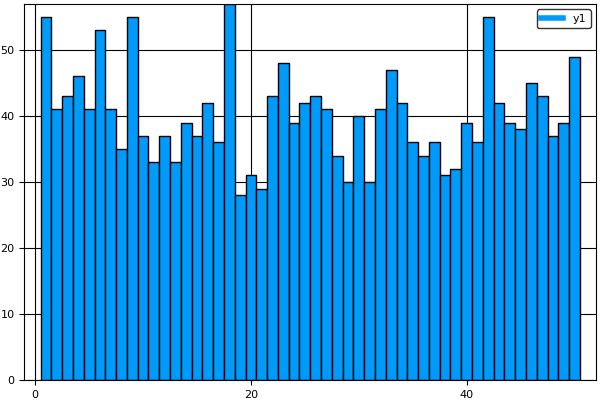

In [194]:
bar(histo(rand(2000),50))

**[3]** (i) Utiliza tu función para generar $N$ números aleatorios y haz un histograma.

(ii) Cambia $N$ y vuelve a calcular el histograma. Encuentra el tamaño del "error" de las barras con respecto al valor esperado en función de $N$. 

(iii) Dibuja el error *relativo* como función de $N$. ¿Qué esperas que pase? ¿Cómo cambia el error relativo con $N$? 


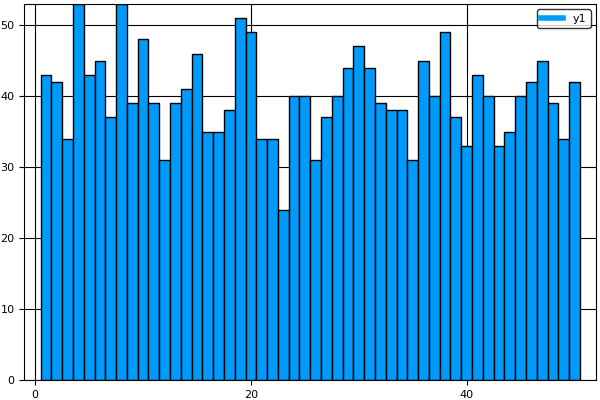

In [195]:
bar(histo(mi_rand(2000),50))

In [196]:
function error_histo(datos, n)
    abs = (histo(datos, n) - length(datos)/n)
end

error_histo (generic function with 1 method)

In [199]:
error_histo(mi_rand(2000),10)

10-element Array{Float64,1}:
  31.0
  16.0
  11.0
   2.0
  -3.0
  -3.0
  -8.0
 -13.0
  -2.0
 -31.0


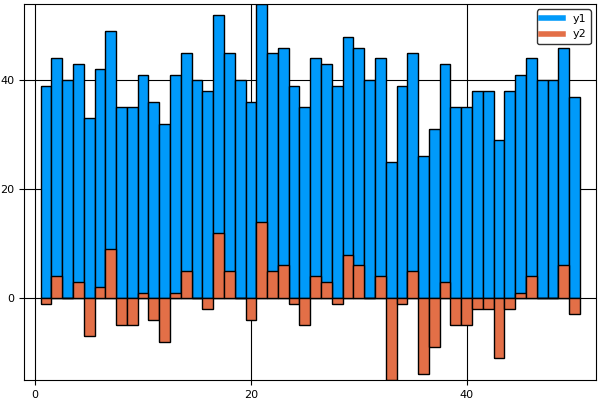

In [202]:
dd = mi_rand(2000)
bar(histo(dd, 50))
bar!(error_histo(dd, 50))

En Julia, existe una función `rand()` que utiliza un generador moderno de alta calidad, actualmente el llamado Mersenne Twister, para generar número aleatorios. Hay otros generadores disponibles en el paquete [`RandomNumbers.jl`](https://github.com/sunoru/RandomNumbers.jl).

# Caminatas aleatorias

Uno de los procesos estocásticos más fundamentales e importantes en la física es el *movimiento Browniano*. Un acercamiento inicial a este problema se da a través de las *caminatas aleatorias*, que modela una partícula que recibe impactos al azar, los cuales hacen que brinque en direcciones aleatorias.

**[4]** Piensa en un caminante aleatorio en una dimensión que vive en los enteros. Empieza en la posición $x=0$. En cada paso de tiempo, brinca a la derecha o a la izquierda con igual probabilidad $\frac{1}{2}$.

(i) Utiliza la función `mi_rand` o `rand` para generar el brinco: $+1$ o $-1$, cada uno con probabilidad $\frac{1}{2}$.

(ii) Haz una función que calcule la trayectoria de una caminata aleatoria que empiece en $0$ y toma $N$ pasos al azar. 

(iii) Dibuja unas cuantas trayectorias en una misma gráfica, con la posición $x(t)$ como función del tiempo $t$. ¿Qué observas?

(iv) Ahora dibuja muchas trayectorias en una misma gráfica. ¿Qué observas?

In [234]:
function caminante1d(n)
    trayectoria = zeros(n)
    for i in 1:n
        if rand()<= 1/2
            trayectoria[i] += 1
        else
            trayectoria[i] -= 1
        end
    end  
    trayectoria     
end

caminante1d (generic function with 1 method)

In [239]:
caminante1d(10)
sum(caminante1d(10))

-2.0

**[5]** Modifica tu función para que brinque a la derecha con probabilidad $p$ y a la izquierda con probabilidad $q := 1-p$. Dibuja las trayectorias para varios valores de $p$. ¿Qué observas?

**[6]** ¿Cómo puedes caracterizar la posición de los caminantes después de $N$ pasos? Hazlo. ¿Cómo evoluciona en el tiempo? Si es demasiado trivial, piensa en otra caracterización.

# Caminatas aleatorias en 2D

**[7]** Una partícula grande inmersa en un fluido lleva a cabo una caminata aleatoria / movimiento Browniano. 

(i) Simula una partícula que vive en una red cuadrada con coordenadas enteras y puede brincar en cualquiera de las 4 direcciones más cercanas con igual probabilidad. 

(ii) Dibuja unas trayectorias. ¿Qué observas?

(iii) Dibuja muchas trayectorias. ¿Qué observas?

(iv) ¿Cómo puedes caracterizar la distribución al tiempo $t$?

**[8]** Para acercarnos al movimiento Browniano, podemos hacer que los brincos sean de distintos tamaños. Piensa en varias formas de hacerlo, implementarlas, y dibuja las trayectorias correspondientes. ¿Cómo se pueden caracterizar los comportamientos resultantes?